In [1]:
print("hello world")

hello world


#  3.函数介绍
###  1.sigmoid 激活函数，将数值固定在0到1之间

In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1+np.exp(-x))

a = sigmoid(1.2)
print(f"a={a}")

a=0.7685247834990175


###  2.ReLU也是一种激活函数

In [35]:
import numpy as np
def relu(x):
    return np.maximum(0,x)

a = relu(5)
b = relu(-1)
print(f"a={a}")
print(f"b={b}")

a=5
b=0


### 3.softmax分类函数，也就是百分比，鉴别那个结果可能性最大

In [36]:
import torch
import numpy as np
def softmax_torch(a):
    c = torch.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=torch.sum(exp_a)
    y=exp_a/sum_exp_a
    return y


def softmax_np(a):
    c = np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y

a = torch.rand(5,3)
b = softmax_torch(a)

print(f"a={a}")
print(f"b={b}")
print(f"tensor b sum out :{torch.sum(b)}")
print(torch.exp(a))


a=tensor([[0.6923, 0.5659, 0.0020],
        [0.3851, 0.7270, 0.3910],
        [0.1326, 0.8035, 0.1574],
        [0.8732, 0.2923, 0.5429],
        [0.3182, 0.1036, 0.5523]])
b=tensor([[0.0833, 0.0734, 0.0417],
        [0.0612, 0.0862, 0.0616],
        [0.0476, 0.0931, 0.0488],
        [0.0998, 0.0558, 0.0717],
        [0.0573, 0.0462, 0.0724]])
tensor b sum out :1.0000001192092896
tensor([[1.9982, 1.7611, 1.0020],
        [1.4698, 2.0690, 1.4784],
        [1.1418, 2.2333, 1.1704],
        [2.3945, 1.3395, 1.7211],
        [1.3747, 1.1092, 1.7373]])


###  4.损失函数中的均方误差，检测数据的有效性，数据的损失程度

In [37]:
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

###  5.损失函数中的交叉熵误差

In [ ]:
import numpy as np

def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

###  6.-log(x)图形以e为底 和 sigmoid函数
$$
y=-\log x \\
$$
$$
z={1 \over {e^{-x}+1}}
$$

/tmp/ipykernel_23079/663420699.py:6: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)


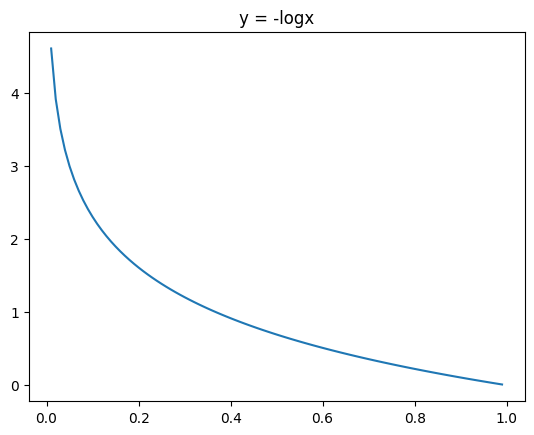

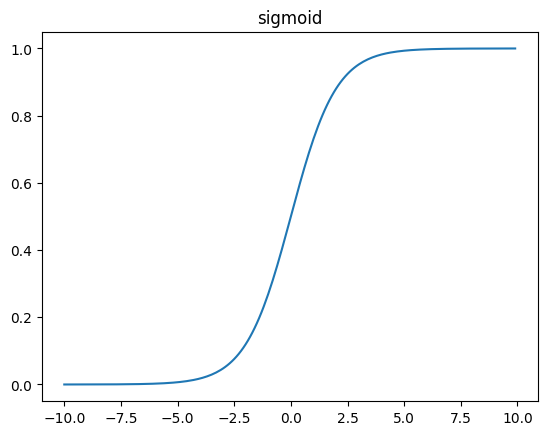

In [57]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

x = np.arange(0,1,0.01)
y = -np.log(x)
plt.title("y = -logx")
plt.plot(x,y)
plt.show()

z = torch.arange(-10,10,0.1)
j = 1/(torch.exp(-z)+1)
plt.title("sigmoid")
plt.plot(z,j)
plt.show()


# 4.交叉熵误差测试
$$
E =  -\sum t_k\log y_k
$$

In [2]:
import numpy as np

def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))


out = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0])
spvision = np.array([0,0,1,0,0,0,0,0,0,0])

print(cross_entropy_error(out,spvision))

0.510825457099338


##  4.1mini-batch的交叉熵实现
#####  one-hot
$$
E = - {1 \over N}\sum_n\sum_k t_{nk}\log y_{nk}
$$

In [33]:
import numpy as np

def cross_entropy_error(y,t):
    if y.ndim==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7)) / batch_size

a = (1/(1+np.exp((np.arange(0,1,0.1)+1e-4).reshape(2,5))))/np.sum(1/(1+np.exp((np.arange(0,1,0.1)+1e-4).reshape(2,5))))#softmax和sigmoid结合^_^
print(f"a={a}")
b = np.zeros((2,5),dtype=int)
b[0,3]=1
b[1,4]=1
print(f"b={b}")
print(f"cross_entropy_error={cross_entropy_error(a,b)}")

#print(int(np.sum(a)))

a=[[0.12772073 0.12133971 0.11499049 0.10870421 0.1025108 ]
 [0.09643836 0.09051275 0.08475717 0.07919187 0.07383392]]
b=[[0 0 0 1 0]
 [0 0 0 0 1]]
cross_entropy_error=2.4125297210104635


##### mini-batch 非one-hot表示

In [53]:
import numpy as np

def cross_entropy_error(y,t):
    if y.ndim==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7)) / batch_size


#注意t的列数需要和y的行数对应
a = np.arange(0,32,1)
a = a.reshape(4,8)
print(a)
b = np.arange(0,4,1)
print(b)
print(cross_entropy_error(a,b))

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]]
[0 1 2 3]
1.9336656073378093


## 4.2数值微分的例子
$$
y = 0.01x^2 + 0.1x
$$

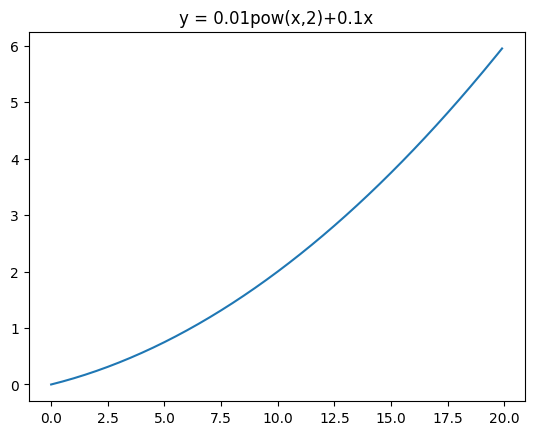

In [5]:
import torch
import matplotlib.pyplot as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = torch.arange(0,20,0.1)
y = function_1(x)
y2 = 0.2
plt.plot(x,y)
plt.title("y = 0.01pow(x,2)+0.1x")
plt.show()

##  4.3偏导数
### f(x0,x1)=pow(x0,2)+pow(x1,2)图像
$$
f(x_0,x_1)=x_0^2+x_1^2
$$

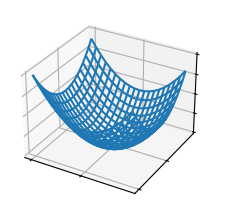

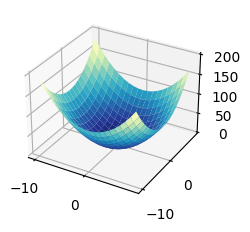

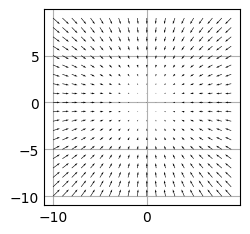

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import torch
import numpy as np

plt.style.use('_mpl-gallery')

# 
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)
Y ,X = np.meshgrid(y,x) 

Z = X**2 + Y**2
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)  # type: ignore
fig, axea = plt.subplots(subplot_kw={"projection": "3d"})
axea.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

#该函数的梯度图像
fig = plt.figure()
axes = plt.axes()
fx , fy = np.gradient(Z)
plt.quiver(X,Y,-fx,-fy)
#该函数的梯度图像

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

## 4.4偏导及多元函数在某一自变量上的导数
$$
{\delta f \over \delta x_0  }  and  {\delta f \over \delta x_0 }
$$

In [4]:
import torch 
import numpy as np
import matplotlib.pyplot as plt


#该函数求某一点上的梯度
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = tmp_val

    return grad

## 4.5梯度下降法求梯度最低的点
$$
x_0 = x_0 - \eta {\delta f \over \delta x_0} 
$$
$$
x_1 = x_1 - \eta {\delta f \over \delta x_1}
$$

$\eta$称为学习率 表示在这一次学习中，应该学习多少

NameError: name 'numerical_gradient' is not defined

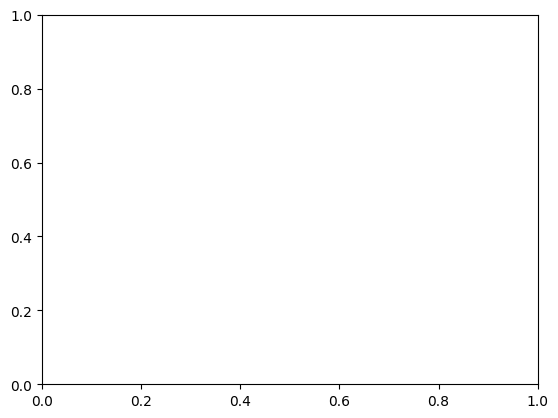

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
axe = plt.axes()

def gradient_descent(f,init_x,lr=0.01,step_num=100):#step_num为训练次数
    x = init_x
    y = np.zeros(step_num)
    j = np.zeros(step_num)
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
        y[i] = x[0]
        j[i] = x[1]

    return x,y,j

def function_2(x):
    return x[0]**2 + x[1]**2


result,y,j = gradient_descent(function_2,np.array([-3.0,4.0]),lr=0.1,step_num=100)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.scatter(y,j)
plt.show()
print(result)

## 4.6学习算法的实现
### mini-batch的实现 
warning:运行该函数前需要重启内核，这样是为了防止该cell加载notebook里面的函数，而不去加载pycode里面的函数

x_train =  (60000, 784) 

t_train =  (60000, 10) 

x_test =  (10000, 784) 

t_test =  (10000, 10) 

on 0: train acc = 0.10441666666666667,test_acc = 0.1028                         
on 600: train acc = 0.1124,test_acc = 0.1136                                    
on 1200: train acc = 0.12706666666666666,test_acc = 0.1307                      
on 1800: train acc = 0.28331666666666666,test_acc = 0.2842                      
on 2400: train acc = 0.3962,test_acc = 0.3921                                   
on 3000: train acc = 0.50485,test_acc = 0.5032                                  
on 3600: train acc = 0.61405,test_acc = 0.6236                                  
on 4200: train acc = 0.6702166666666667,test_acc = 0.6776                       
on 4800: train acc = 0.7152333333333334,test_acc = 0.7238                       
on 5400: train acc = 0.7647833333333334,test_acc = 0.7699                       
on 6000: train acc = 0.7925666666666666,test_acc = 0.7976                       
on 6600: 

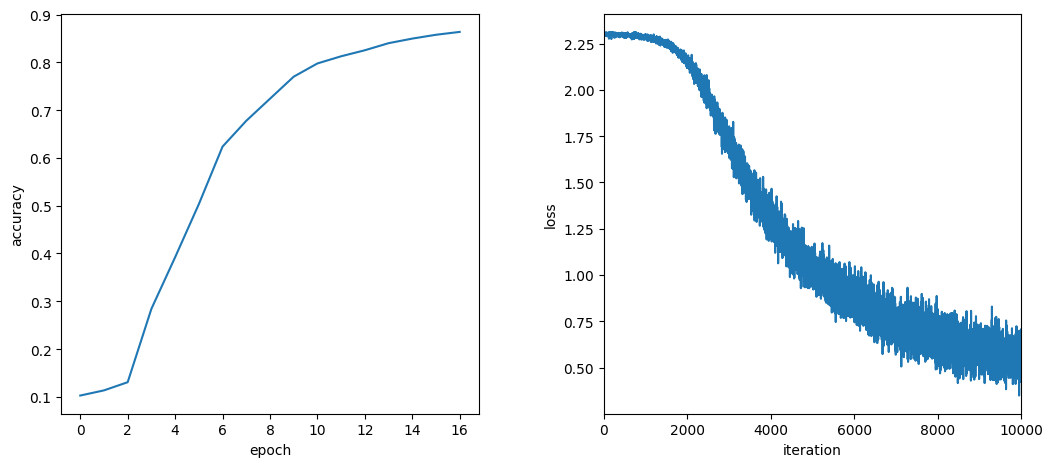

In [1]:
import sys
sys.path.append('..')
import numpy as np
from pycode.ch01.mnist import load_mnist
from pycode.ch04.two_layer_net import TwoLaterNet
from pycode.functions import *
import matplotlib.pyplot as plt 
from alive_progress import alive_bar

# 加载minist数据集
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True,one_hot_label=True)

network = TwoLaterNet(input_size=784,hidden_size=50,output_size=10)

# 超参数
iter_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# 交叉熵函数列表，用来存放每次学习的交叉熵值
train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size/batch_size,1)

print('x_train = ',x_train.shape,'\n')
print('t_train = ',t_train.shape,'\n')
print('x_test = ',x_test.shape,'\n')
print('t_test = ',t_test.shape,'\n')


with alive_bar(iter_num, spinner='waves',force_tty=True) as bar:
    for i in range(iter_num):
        batch_mask = np.random.choice(train_size,batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # 通过推理算出结果的交叉熵值，通过数值微分算出每一个权重和偏置的导数，并且以字典的形式返回每一层权重和偏置的导数
        #grad = network.numerical_gradient(x_batch,t_batch)
        grad = network.gradient(x_batch, t_batch)#高速版

        for key in ('w1','b1','w2','b2'):
            network.params[key] -= learning_rate*grad[key]

        loss = network.loss(x_batch,t_batch)
        train_loss_list.append(loss)
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train,t_train)
            test_acc = network.accuracy(x_test,t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print(f"train acc = {train_acc},test_acc = {test_acc}")
        bar()

# 在一个画布里面创建两个子图
fig,axe = plt.subplots(ncols=2,figsize=(12,5))

# 设置x，y轴的坐标
axe[1].set_xlim(0,iter_num)

axe[0].set_ylabel('accuracy')
axe[0].set_xlabel('epoch') 

axe[1].set_ylabel('loss')
axe[1].set_xlabel('iteration')

plt.subplots_adjust(wspace=0.3, hspace=0.3, left=0.1, right=0.9, top=0.9, bottom=0.1)

axe[0].plot(list(range(0,int(iter_num/iter_per_epoch)+1,1)),test_acc_list)
axe[1].plot(list(range(0,iter_num,1)),train_loss_list)




In [1]:
from alive_progress import alive_bar
import time
with alive_bar(1000, spinner='waves',force_tty=True,bar='halloween') as bar:
    for i in range(1000):
        time.sleep(.01)
        bar()

|🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃🎃| 1000/1000 [100%] in 10.2s (98.48/s)  


In [15]:
import numpy as np

a = 6
print(max(a,1))

6
